# Si111 energy scan of a double crystal reflection (Bragg & Laue)

In [7]:
import numpy

from crystalpy.diffraction.GeometryType import BraggDiffraction, LaueDiffraction
from crystalpy.diffraction.DiffractionSetupXraylib import DiffractionSetupXraylib
from crystalpy.diffraction.Diffraction import Diffraction  as Diffraction

import scipy.constants as codata

from crystalpy.util.Vector import Vector

from crystalpy.util.Photon import Photon

In [8]:
def calculate_bragg_dcm(energy_setup=8000.0,energies=numpy.linspace(7990,8010,200),calculation_method=0):

    diffraction_setup_r = DiffractionSetupXraylib(geometry_type=BraggDiffraction(),  # GeometryType object
                                           crystal_name="Si",  # string
                                           thickness=100e-6,  # meters
                                           miller_h=1,  # int
                                           miller_k=1,  # int
                                           miller_l=1,  # int
                                           asymmetry_angle=0,  # 10.0*numpy.pi/180.,            # radians
                                           azimuthal_angle=0.0)  # radians                            # int

    diffraction = Diffraction()

    scan = numpy.zeros_like(energies)
    r = numpy.zeros_like(energies)

    bragg_angle = diffraction_setup_r.angleBragg(energy_setup)
    print("Bragg angle for E=%f eV is %f deg" % (energy_setup, bragg_angle * 180.0 / numpy.pi))

    for i in range(energies.size):
        #
        # gets Bragg angle needed to create deviation's scan
        #
        energy = energies[i]

        # Create a Diffraction object (the calculator)

        deviation = 0.0 # angle_deviation_min + ia * angle_step
        angle = deviation  + bragg_angle

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(angle)
        zz = - numpy.abs(numpy.sin(angle))
        photon = Photon(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz))

        # perform the calculation
        coeffs_r = diffraction.calculateDiffractedComplexAmplitudes(diffraction_setup_r, photon, calculation_method=calculation_method)

        scan[i] = energy
        r[i] = numpy.abs( coeffs_r['S'] )**4

    return scan,r

In [9]:
def calculate_laue_monochromator(energy_setup=8000.0,energies=numpy.linspace(7990,8010,200), calculation_method=0):

    diffraction_setup_r = DiffractionSetupXraylib(geometry_type=LaueDiffraction(),  # GeometryType object
                                           crystal_name="Si",  # string
                                           thickness=10e-6,  # meters
                                           miller_h=1,  # int
                                           miller_k=1,  # int
                                           miller_l=1,  # int
                                           asymmetry_angle=numpy.pi/2,  # 10.0*numpy.pi/180.,            # radians
                                           azimuthal_angle=0.0)  # radians                            # int

    diffraction = Diffraction()

    scan = numpy.zeros_like(energies)
    r = numpy.zeros_like(energies)

    bragg_angle = diffraction_setup_r.angleBragg(energy_setup)
    print("Bragg angle for E=%f eV is %f deg" % (energy_setup, bragg_angle * 180.0 / numpy.pi))

    for i in range(energies.size):
        #
        # gets Bragg angle needed to create deviation's scan
        #
        energy = energies[i]

        # Create a Diffraction object (the calculator)

        deviation = 0.0  # angle_deviation_min + ia * angle_step
        angle = deviation + numpy.pi / 2 + bragg_angle

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(angle)
        zz = - numpy.abs(numpy.sin(angle))
        photon = Photon(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz))

        # perform the calculation
        coeffs_r = diffraction.calculateDiffractedComplexAmplitudes(diffraction_setup_r, photon, calculation_method=calculation_method)

        scan[i] = energy
        r[i] = numpy.abs( coeffs_r['S'] )**4

    return scan,r

In [10]:
from srxraylib.plot.gol import plot
calculation_method = 0 # 0=Zachariasen, 1=Guigay

Bragg angle for E=8000.000000 eV is 14.308608 deg


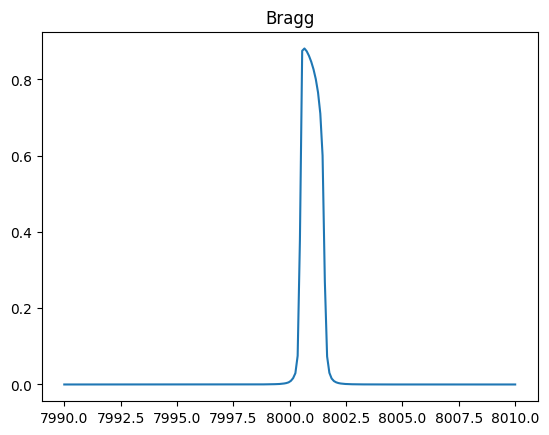

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:title={'center':'Bragg'}>)

In [11]:
scan,r = calculate_bragg_dcm(calculation_method=calculation_method)
plot(scan,r, title="Bragg")

Bragg angle for E=8000.000000 eV is 14.308608 deg


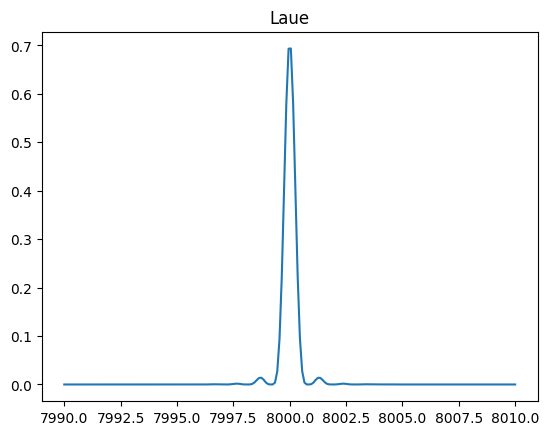

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:title={'center':'Laue'}>)

In [12]:
scan,r = calculate_laue_monochromator(calculation_method=calculation_method)
plot(scan,r, title="Laue")